In [28]:
#Still need to swap deventer-gorssel in problem formulation for gorssel, as it is annoying for PCA 2 needs to be maximised and 1 minimised
#FORso 1: as high as possible, 2: as low as possible, and 3: as high as possible -> to correct PCA, still need to do

In [45]:
from ema_workbench.analysis import prim
from ema_workbench import load_results
from sklearn.decomposition import PCA
from sklearn import preprocessing
from problem_formulation import get_model_for_problem_formulation
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
experiments, outcomes = load_results("data/generated/genscen_Overijssel_30_05-06-2021-18-39-58.tar.gz")
dike_model, planning_steps = get_model_for_problem_formulation("Overijssel")
uncertainties = [uncertainty.name for uncertainty in dike_model.uncertainties]

In [57]:
norm_outcomes = preprocessing.normalize(pd.DataFrame(outcomes))

In [52]:
experiments[uncertainties]

,discount rate 0,discount rate 1,discount rate 2,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.1_Brate,A.2_Bmax,A.2_pfail,A.2_Brate,...,2_RfR 2,A.1_DikeIncrease 0,A.1_DikeIncrease 1,A.1_DikeIncrease 2,A.2_DikeIncrease 0,A.2_DikeIncrease 1,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2
0,2.5,4.5,4.5,13.0,254.653930,0.909180,1.5,100.179744,0.094383,1.5,...,0.0,0.0,4.0,1.0,6.0,2.0,4.0,5.0,3.0,7.0
1,2.5,3.5,1.5,59.0,83.023678,0.560962,10.0,273.497657,0.618297,1.0,...,0.0,4.0,2.0,6.0,3.0,3.0,3.0,8.0,5.0,10.0
2,1.5,2.5,2.5,1.0,205.493710,0.080618,1.5,123.804942,0.861738,10.0,...,1.0,6.0,3.0,7.0,1.0,2.0,6.0,3.0,9.0,1.0
3,2.5,3.5,3.5,34.0,66.565644,0.828069,10.0,217.334635,0.940281,1.0,...,1.0,9.0,8.0,4.0,0.0,7.0,7.0,10.0,7.0,10.0
4,3.5,4.5,2.5,131.0,131.888772,0.511374,1.0,44.836684,0.048107,1.0,...,1.0,10.0,5.0,10.0,0.0,9.0,5.0,1.0,2.0,9.0
5,3.5,2.5,2.5,36.0,230.976628,0.760246,10.0,167.550308,0.467456,1.0,...,0.0,4.0,6.0,9.0,0.0,6.0,9.0,1.0,6.0,5.0
6,3.5,4.5,2.5,88.0,171.147267,0.217840,1.0,141.475547,0.431307,1.5,...,0.0,2.0,10.0,7.0,10.0,10.0,6.0,1.0,2.0,9.0
7,4.5,3.5,3.5,98.0,342.144553,0.456635,1.5,106.667335,0.759321,1.0,...,0.0,1.0,0.0,3.0,8.0,8.0,4.0,2.0,7.0,3.0
8,1.5,1.5,1.5,65.0,164.315076,0.671060,10.0,170.549174,0.821068,10.0,...,1.0,1.0,1.0,5.0,5.0,7.0,1.0,1.0,4.0,6.0
9,1.5,2.5,4.5,92.0,156.798717,0.882390,1.0,74.434431,0.242554,10.0,...,1.0,10.0,9.0,5.0,4.0,5.0,0.0,8.0,0.0,8.0


In [49]:
pca = PCA(n_components=1)
pca.fit(norm_outcomes.T)
y = pd.Series(pca.components_[0])
x = experiments[uncertainties]

In [53]:
y

0     0.229579
1     0.238982
2     0.152409
3     0.242295
4     0.183520
5     0.171453
6     0.142081
7    -0.104663
8     0.245607
9     0.238430
10    0.243868
11    0.238715
12   -0.104686
13    0.241606
14   -0.105297
15    0.238646
16    0.094406
17   -0.105047
18    0.043886
19    0.232508
20   -0.103170
21    0.229993
22    0.232667
23   -0.103634
24    0.236436
25   -0.105010
26   -0.104330
27    0.040800
28   -0.102658
29    0.220598
dtype: float64

In [54]:
prim_alg = prim.Prim(x, y < 0.1, threshold=0.8)

In [55]:
box1 = prim_alg.find_box()

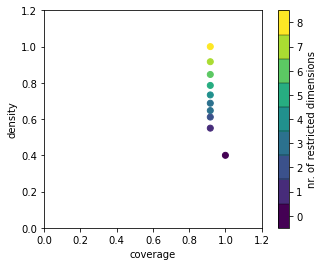

In [56]:
box1.show_tradeoff()
plt.show()

coverage    0.965517
density          1.0
id                 1
mass        0.933333
mean             1.0
res_dim            1
Name: 1, dtype: object

              box 1                                       
                min       max                    qp values
A.5_pfail  0.081009  0.995343  [0.38703372427520755, -1.0]



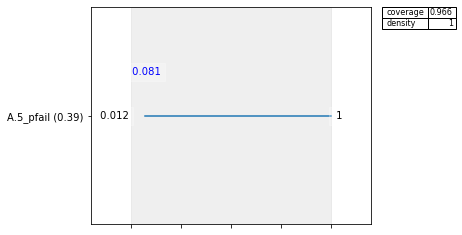

In [44]:
box1.inspect(1)
box1.inspect(1, style='graph')
plt.show()

C:\Users\Lisette\anaconda3\envs\adsim\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


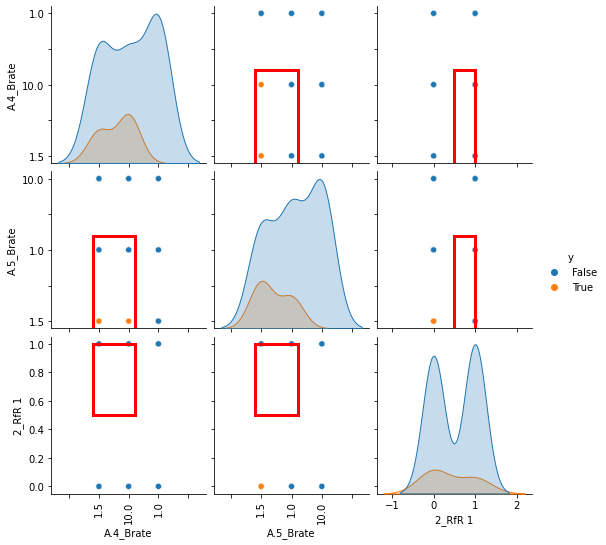

In [8]:
box1.select(3)
box1.show_pairs_scatter()